In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [2]:
batch_size = 200
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zehra/Desktop/Deneme/Dataset/data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 153 files belonging to 2 classes.


In [4]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zehra/Desktop/Deneme/Dataset/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)



Found 108 files belonging to 2 classes.


In [5]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zehra/Desktop/Deneme/Dataset/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 78 files belonging to 2 classes.


In [6]:
class_names = training_ds.class_names

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)
MyCnn = tf.keras.models.Sequential([
layers.BatchNormalization(),
layers.Conv2D(32, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(256, activation='relu'),
layers.Dense(len(class_names), activation= 'softmax')
])


Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.7299 - accuracy: 0.5033 - val_loss: 563.9374 - val_accuracy: 0.5648
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 33.6132 - accuracy: 0.4967 - val_loss: 33.1723 - val_accuracy: 0.4352
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 0.9522 - accuracy: 0.5229 - val_loss: 35.0667 - val_accuracy: 0.4352
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 2.1905 - accuracy: 0.5033 - val_loss: 2.1683 - val_accuracy: 0.4815
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 0.3904 - accuracy: 0.8497 - val_loss: 10.1184 - val_accuracy: 0.5648
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 1.3490 - accuracy: 0.5359 - val_loss: 4.1679 - val_accuracy: 0.5648
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.6583 - accuracy: 0.6928 - val_loss: 0.4651 - val_accuracy: 0.7778
Epoch 8/100
1/1 [===========

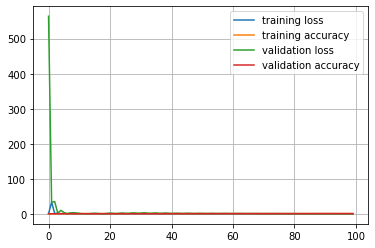

In [8]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs =100)


plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [9]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
   

<Figure size 2160x2160 with 0 Axes>

In [10]:
 for mem in predictions:
        deneme=predlabel.append(class_names[np.argmax(mem)])
        print(class_names[np.argmax(mem)])
        deneme=prdlbl.append(np.argmax(mem))
      
    


Non Accident
Accident
Accident
Accident
Accident
Non Accident
Accident
Accident
Accident
Non Accident
Non Accident
Non Accident
Non Accident
Non Accident
Accident
Accident
Accident
Non Accident
Accident
Accident
Accident
Non Accident
Accident
Non Accident
Non Accident
Non Accident
Accident
Accident
Accident
Non Accident
Accident
Non Accident
Non Accident
Accident
Non Accident
Accident
Accident
Non Accident
Accident
Non Accident
Accident
Non Accident
Non Accident
Accident
Non Accident
Accident
Non Accident
Accident
Accident
Accident
Non Accident
Non Accident
Accident
Non Accident
Accident
Non Accident
Non Accident
Accident
Non Accident
Accident
Accident
Non Accident
Non Accident
Non Accident
Non Accident
Accident
Non Accident
Accident
Non Accident
Non Accident
Non Accident
Non Accident
Non Accident
Accident
Accident
Accident
Non Accident
Non Accident


In [11]:
 AccuracyVector = np.array(prdlbl) == labels
print("AccuracyVector: ", AccuracyVector)
   

AccuracyVector:  tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True False  True  True], shape=(78,), dtype=bool)


In [12]:
sayac=0
for values in AccuracyVector:
    if(values==True):
        sayac=sayac+1
testAccuarcy=sayac/78
print("Test Accuarcy: ", testAccuarcy)

Test Accuarcy:  0.9230769230769231


In [13]:
sayac=0
for values in AccuracyVector:
    if(values==True):
        sayac=sayac+1
testAccuarcy=sayac/78
print("Test Accuarcy: ", testAccuarcy)

Test Accuarcy:  0.9230769230769231
